# Customer Profiling

## The goal of this project is to leverage AI/ ML model to segment existing customers of any company in order to find potential customers for launching a new product. This project can help analysts and the marketing teams to better understand the buying patterns of existing customers and approach them with the deal with personalized metrics on how they can reduce the cost they currently incur and improve their experience with the new product.

The steps performed in this task are:
1. Visualize and explore datasets
2. Scikit-Learn library to find the optimal number of clusters using elbow method
3. k-means using Scikit-Learn to perform customer segmentation
4. Principal Component Analysis (PCA) technique to perform dimensionality reduction and data visualization

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
dataset = pd.read_excel('static/dataset.xlsx')
dataset

,CUST_ID,PURCHASES,SUPPORT_PURCHASES,PURCHASES_FREQUENCY,SUPPORT_FREQUENCY,ACTIVITY,PRODUCT_TYPE,SEGMENT
0,C10001,95.40,95.40,0.166667,0.083333,0.141667,0,5
1,C10002,0.00,0.00,0.000000,0.000000,0.000000,0,3
2,C10003,773.17,0.00,1.000000,0.000000,0.700000,0,3
3,C10004,1499.00,0.00,0.083333,0.000000,0.058333,1,1
4,C10005,16.00,0.00,0.083333,0.000000,0.058333,0,3
...,...,...,...,...,...,...,...,...
8945,C19186,291.12,291.12,1.000000,0.833333,0.950000,0,4
8946,C19187,300.00,300.00,1.000000,0.833333,0.950000,0,5
8947,C19188,144.40,144.40,0.833333,0.666667,0.783333,0,5
8948,C19189,0.00,0.00,0.000000,0.000000,0.000000,0,4


# Mock Data - Column Description

* ## Customer ID - Unique Identifier for a customer. Doesn't really help the process.
* ## Purchases - Amount of money spent by the customers on various products.
* ## Support Purchases - Amount of money spent by the customers on support (online/offline).
* ## Purchase Frequency - How often does a customer buy a product from the company.
* ## Support Frequency - How often does a customer pay for support related services.
* ## Activity - Binary Value. Is the customer an active customer?
* ## Product Type - Binary Value. Is the customer buying products closely associated with what the new product is offering?
* ## Segment - Reporting Segment Level for the Customer's visit. 5 Random Categories included.

In [4]:
# By using following info function, we can see data types and get to know about null value existance 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              8950 non-null   object 
 1   PURCHASES            8950 non-null   float64
 2   SUPPORT_PURCHASES    8950 non-null   float64
 3   PURCHASES_FREQUENCY  8950 non-null   float64
 4   SUPPORT_FREQUENCY    8950 non-null   float64
 5   ACTIVITY             8950 non-null   float64
 6   PRODUCT_TYPE         8950 non-null   int64  
 7   SEGMENT              8950 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 559.5+ KB


In [5]:
# By using following descibe function, we can get to know about important features of a coulmn, i.e, min, max and mean values
dataset.describe()
# This helps to give insights about data, i.e, Balance is frequently updated on average ~0.9, scale-->(0,1)

,PURCHASES,SUPPORT_PURCHASES,PURCHASES_FREQUENCY,SUPPORT_FREQUENCY,ACTIVITY,PRODUCT_TYPE,SEGMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1003.204834,411.067645,0.490351,0.364437,0.452577,0.274078,2.999665
std,2136.634782,904.338115,0.401371,0.397448,0.388551,0.446074,1.414806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,39.635000,0.000000,0.083333,0.000000,0.058333,0.000000,2.000000
50%,361.280000,89.000000,0.500000,0.166667,0.408333,0.000000,3.000000
75%,1110.130000,468.637500,0.916667,0.750000,0.854167,1.000000,4.000000
max,49039.570000,22500.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Visualize and Explore Data

<AxesSubplot:>

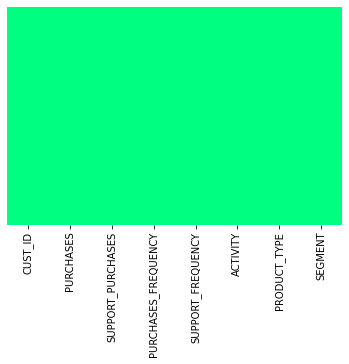

In [6]:
# Lets check misiing values, it seems that we have very less amount of missing values
sns.heatmap(dataset.isnull(), yticklabels= False, cbar =False, cmap = 'winter_r')

In [7]:
dataset.isnull().sum()

CUST_ID                0
PURCHASES              0
SUPPORT_PURCHASES      0
PURCHASES_FREQUENCY    0
SUPPORT_FREQUENCY      0
ACTIVITY               0
PRODUCT_TYPE           0
SEGMENT                0
dtype: int64

In [8]:
# Check if we have any duplicated entries and the result shows that all entries are unique
dataset.duplicated().sum()

0

In [9]:
# Dropping the ID column which dosent provide any info but a sequentail order
dataset.drop(columns= 'CUST_ID', axis = 1, inplace= True)

In [10]:
print( 'Number of columns = {}'.format(len(dataset.columns)))
dataset.columns

Number of columns = 7


Index(['PURCHASES', 'SUPPORT_PURCHASES', 'PURCHASES_FREQUENCY',
       'SUPPORT_FREQUENCY', 'ACTIVITY', 'PRODUCT_TYPE', 'SEGMENT'],
      dtype='object')

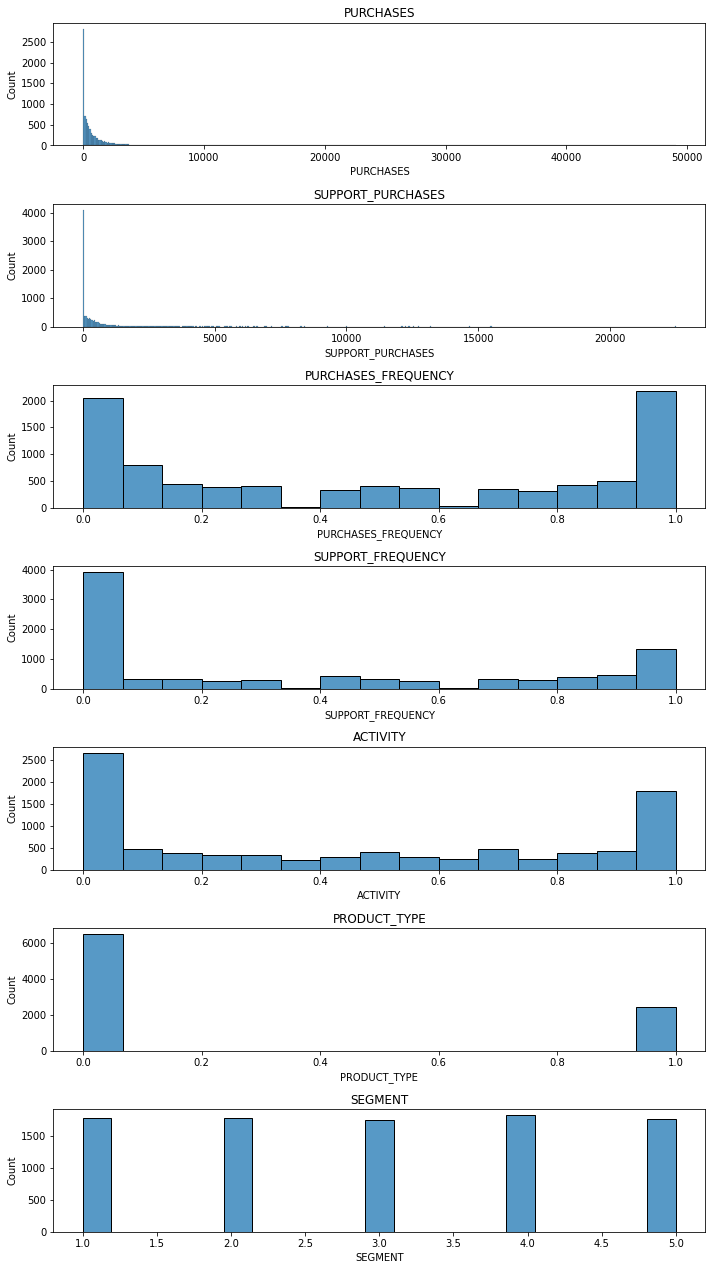

In [11]:
# Now we are going to use dist_plot which is a combination of "hist" function in matplotlib and "KDE" in seaborn
# KDE is used to plot the probability distribution function of a variable
plt.figure(figsize=(10,50))
for i in range (len(dataset.columns)):
    plt.subplot(20,1,i+1)
    sns.histplot(dataset[dataset.columns[i]])#, kde_kws= {'color' : 'b', 'lw': 5, 'label': 'KDE', 'bw_method': 1.5})
    plt.title(dataset.columns[i])
plt.tight_layout()

Now we will plot correlation between features.
The correlation coefficient has values between -1 to 1.
1.  A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2.  A value closer to 1 implies stronger positive correlation
3.  A value closer to -1 implies stronger negative correlation

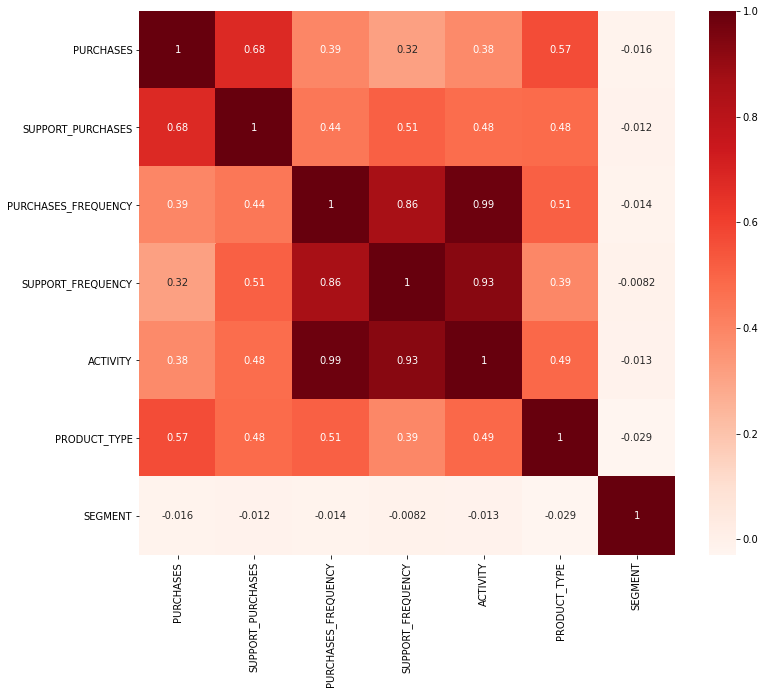

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# K-Means Algorithm

## K- means is an un-supervised machine learning algorithm. It groups data in clusters in an un-supervised fashion. It uses Euclidian distance to measure similarity between attribute values.

# Elbow Method

## Elbow method is a very popular method to calculate optimal number of clusters for a given problem. Within clusters the sum of square distance is calculated and plotted against the number of clusters. The elbow point in plot is selected as optimal number of clusters for given problem.

In [13]:
# Lets re-scale data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

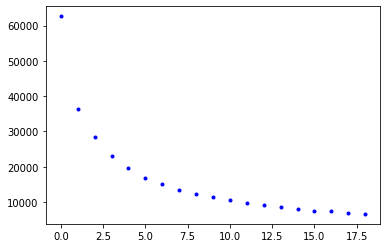

In [14]:
# Now we are going to implement Elbow method to final optimal number of clusters
first_score = []
inertia = 999999999
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset_scaled)
    first_score.append(kmeans.inertia_) #inertia gives the within cluster distance of each point from its centroid as we discussed above.

plt.plot (first_score, 'b.')

In [15]:
# We can see from above plot that the optimal number of clusters in this case are 5.
# So lets apply kmeans method.
clusters = 4
kmeans = KMeans(clusters)
kmeans.fit(dataset_scaled)
labels = kmeans.labels_ #labels --> clusters
print(labels.shape)
labels

(8950,)


array([1, 1, 3, ..., 3, 1, 0])

In [16]:
kmeans.cluster_centers_.shape

(4, 7)

In [17]:
# Lets create a dataframe consists of cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [dataset.columns])
cluster_centers

,PURCHASES,SUPPORT_PURCHASES,PURCHASES_FREQUENCY,SUPPORT_FREQUENCY,ACTIVITY,PRODUCT_TYPE,SEGMENT
0,0.784511,0.715686,0.995216,0.812098,0.968845,1.627450,-0.042971
1,-0.358398,-0.416303,-0.882326,-0.800921,-0.883785,-0.479680,0.015787
2,6.556560,6.589536,1.124250,1.249330,1.196322,1.627450,-0.025312
3,-0.248192,-0.061564,0.858599,0.858296,0.884234,-0.614458,0.008983


In [18]:
# As the data is scaled so lets perform inverse transform to know better what this data actually means
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed, columns= [dataset.columns])
cluster_centers_inversed

,PURCHASES,SUPPORT_PURCHASES,PURCHASES_FREQUENCY,SUPPORT_FREQUENCY,ACTIVITY,PRODUCT_TYPE,SEGMENT
0,2679.324575,1058.253754,0.889779,0.687186,0.829001,1.000000e+00,2.938873
1,237.481904,34.610412,0.136230,0.046131,0.109201,6.011762e-02,3.022000
2,15011.395783,6369.903373,0.941566,0.860953,0.917382,1.000000e+00,2.963855
3,472.938740,355.395820,0.834948,0.705546,0.796127,-8.881784e-16,3.012374


In [24]:
# Now we can have the label associated with each point
ykmeans = kmeans.fit_predict(dataset_scaled)

ykmeans = ykmeans+1
ykmeans

array([3, 3, 2, ..., 2, 3, 4])

In [25]:
#Lets concatenate the cluster labels with original data, which will help to plot the histograms of each cluster
dataset_cluster = pd.concat([dataset, pd.DataFrame({'cluster': ykmeans})], axis = 1)
dataset_cluster

,PURCHASES,SUPPORT_PURCHASES,PURCHASES_FREQUENCY,SUPPORT_FREQUENCY,ACTIVITY,PRODUCT_TYPE,SEGMENT,cluster
0,95.40,95.40,0.166667,0.083333,0.141667,0,5,3
1,0.00,0.00,0.000000,0.000000,0.000000,0,3,3
2,773.17,0.00,1.000000,0.000000,0.700000,0,3,2
3,1499.00,0.00,0.083333,0.000000,0.058333,1,1,3
4,16.00,0.00,0.083333,0.000000,0.058333,0,3,3
...,...,...,...,...,...,...,...,...
8945,291.12,291.12,1.000000,0.833333,0.950000,0,4,2
8946,300.00,300.00,1.000000,0.833333,0.950000,0,5,2
8947,144.40,144.40,0.833333,0.666667,0.783333,0,5,2
8948,0.00,0.00,0.000000,0.000000,0.000000,0,4,3


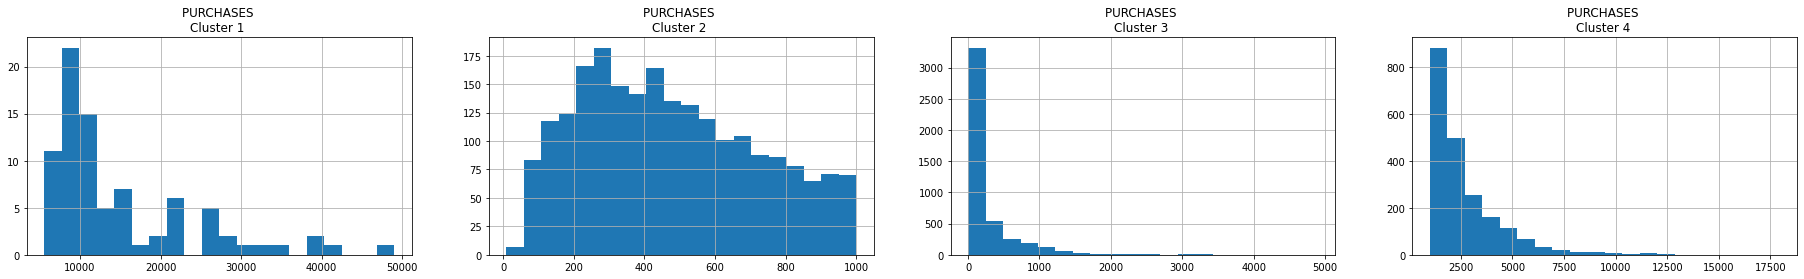

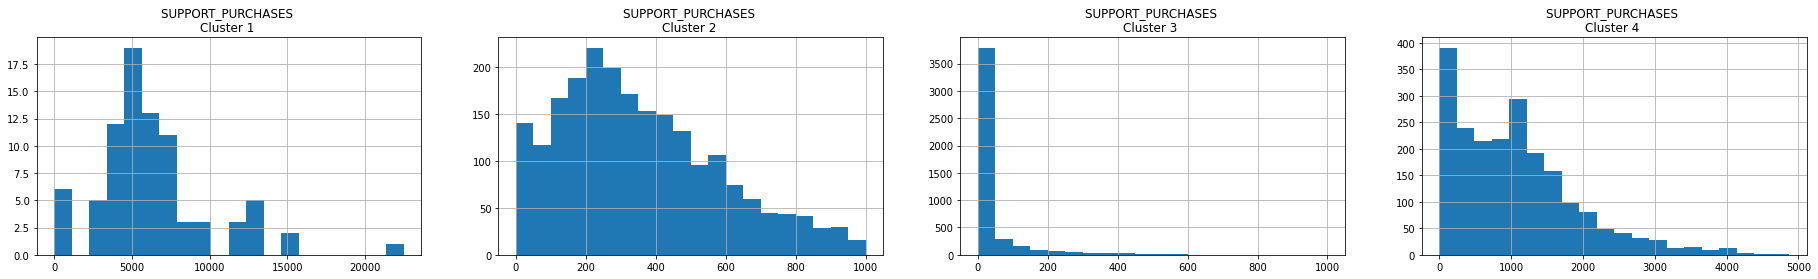

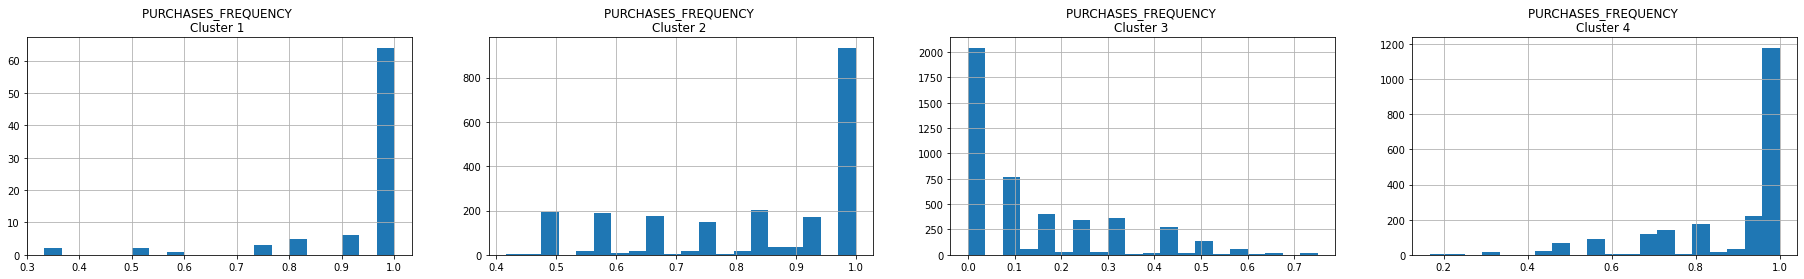

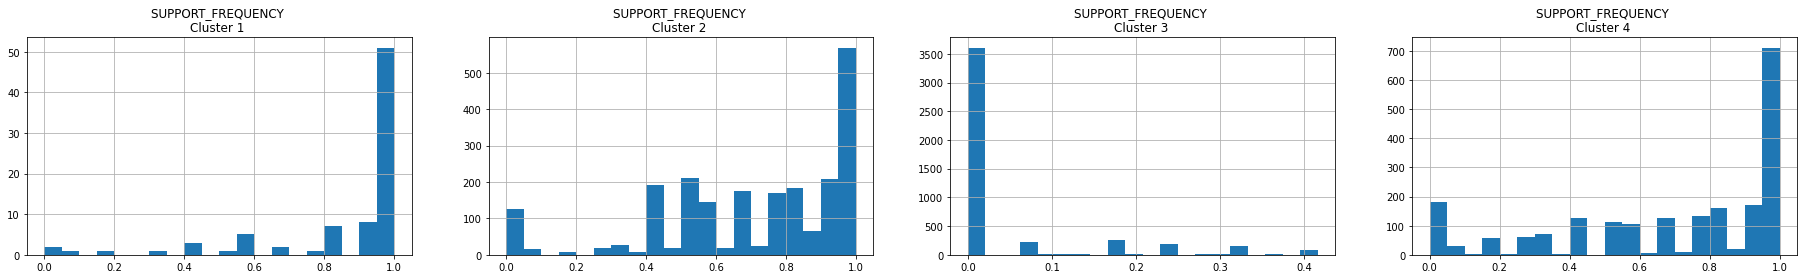

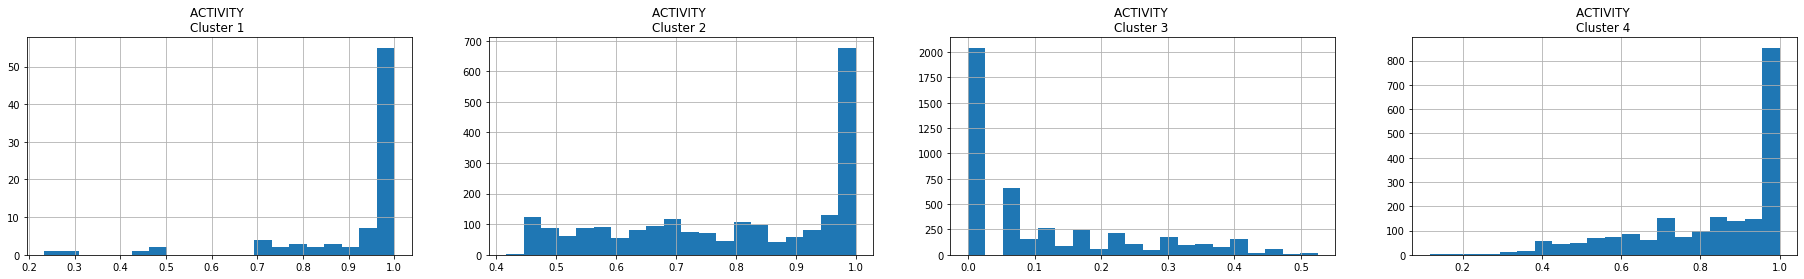

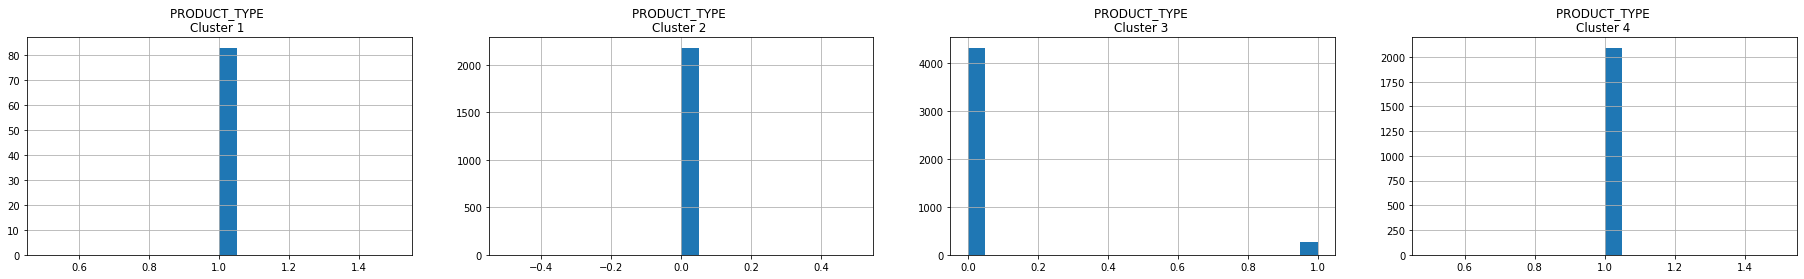

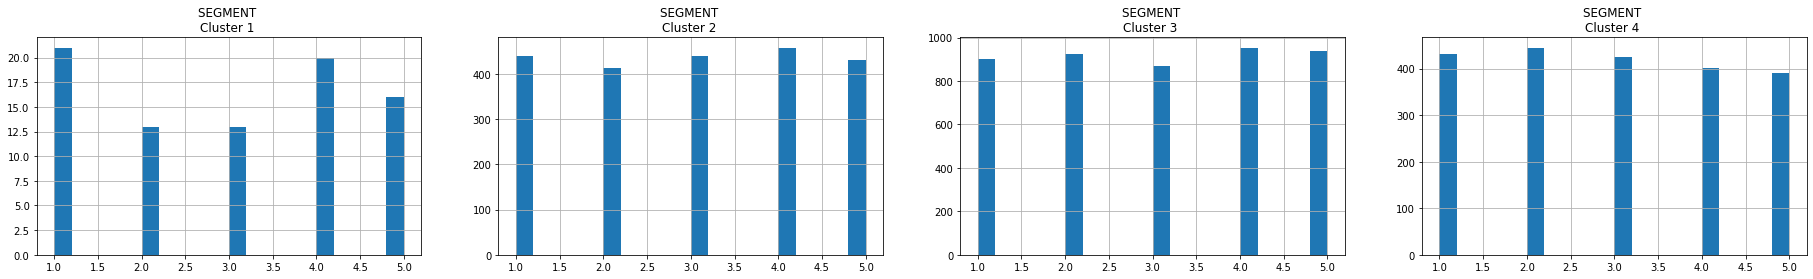

In [26]:
# Now lets plot histogram of each cluster
for i in dataset.columns:
    plt.figure(figsize=(40,4))
    for j in range(1, clusters+1):
        plt.subplot(1,5,j+1)
        cluster = dataset_cluster[dataset_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {} '.format(i,j))
    plt.show()

# So what does these histograms mean?

## Cluster 0 (Experimenters)
* Low value purchases
* Almost no money spent on support
* Low frequency product and support purchases
* Inactive customers
* Mostly intrested in products dissimilar to APEX. Few interested in similar products

## Cluster 1 (Transactors)
* Low value purchases
* Almost no money spent on support
* Low frequency product and support purchases
* Active customers (Only difference with Cluster 0)
* Mostly intrested in products dissimilar to APEX. Few interested in similar products

## Cluster 2 (Fans)
* Intermedite value purchases
* Some amount of money spent on support
* High frequency product and support purchases
* Mix of Active & Inactive customers
* Mostly intrested in products dissimilar to APEX. Few interested in similar products

## Cluster 3 (Whales)
* High value purchases
* Great amount of money spent on support
* High frequency product and support purchases
* Mix of Active & Inactive customers
* Mostly intrested in products similar to APEX.

## Cluster 4 (Sweet Spot)
* Intermedite-to-High value purchases
* Intermedite-to-High amount of money spent on support
* High frequency product and support purchases
* Mix of Active & Inactive customers
* Mostly intrested in products similar to APEX.

# Principal componenet Analysis (PCA)

1. PCA is an unsupervised ML algorithm that tries to reduce the dimension of data while preserving the actual information. 
2. PCA algorithm could be used for dimensionality reduction by trying to find a new set of features called components while maintaining the original information. 

In [27]:
#Lets convert our data to only 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dataset_scaled)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': ykmeans})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.565442,0.085466,3
1,-2.057256,0.450200,3
2,0.060119,-0.764588,2
3,-0.851014,1.615484,3
4,-1.888342,0.335591,3


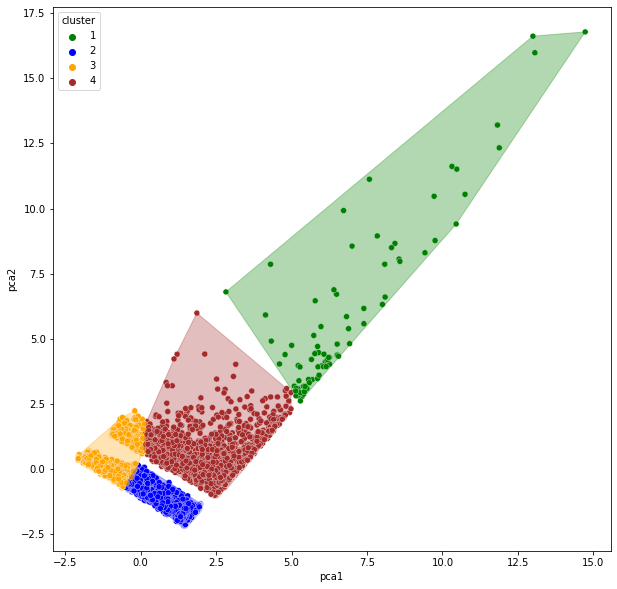

In [30]:
palette = {
    0: "red",
    1: "green",
    2: "blue",
    3: "orange",
    4: "brown"
}

plt.figure(figsize=(10,10))
# ax = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster', data=pca_df, palette=palette)
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster', data=pca_df, palette=palette)

from scipy.spatial import ConvexHull
for i in sorted(pca_df.cluster.unique()):
    points = pca_df[pca_df.cluster == i][['pca1', 'pca2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    
    plt.fill(x_hull, y_hull, alpha=0.3, c=palette[i])

plt.show()